In [2]:
import pandas as pd

data = pd.read_csv('Datasets/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking the null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Filling the mean value to age
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [6]:
# Checking the null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Drop the un-necessary column's subset 
data.dropna(subset=["Embarked"], inplace=True)

In [12]:
# Drop the un-necessary column's subset 
data.dropna(subset=["Cabin"], inplace=True)

In [13]:
# Checking the null values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
# Checking for duplicated values if exists
data.duplicated().sum()

0

In [16]:
# dropping the un-necessary columns
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
data.drop(columns=columns_to_drop, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S


In [17]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [18]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [21]:
# Common technique for encoding the categorical data
# 1. Labed Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoding the 'Sex' object
data['Sex'] = label_encoder.fit_transform(data['Sex'])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,0,38.0,1,0,71.2833,C
3,1,1,0,35.0,1,0,53.1000,S
6,0,1,1,54.0,0,0,51.8625,S
10,1,3,0,4.0,1,1,16.7000,S
11,1,1,0,58.0,0,0,26.5500,S


In [22]:
# 2. One-Hot Encoding 
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
1,1,1,0,38.0,1,0,71.2833,False,False
3,1,1,0,35.0,1,0,53.1000,False,True
6,0,1,1,54.0,0,0,51.8625,False,True
10,1,3,0,4.0,1,1,16.7000,False,True
11,1,1,0,58.0,0,0,26.5500,False,True


In [33]:
# Save the cleaned datasets
data.to_csv('cleaned_titanic.csv')

Visualization

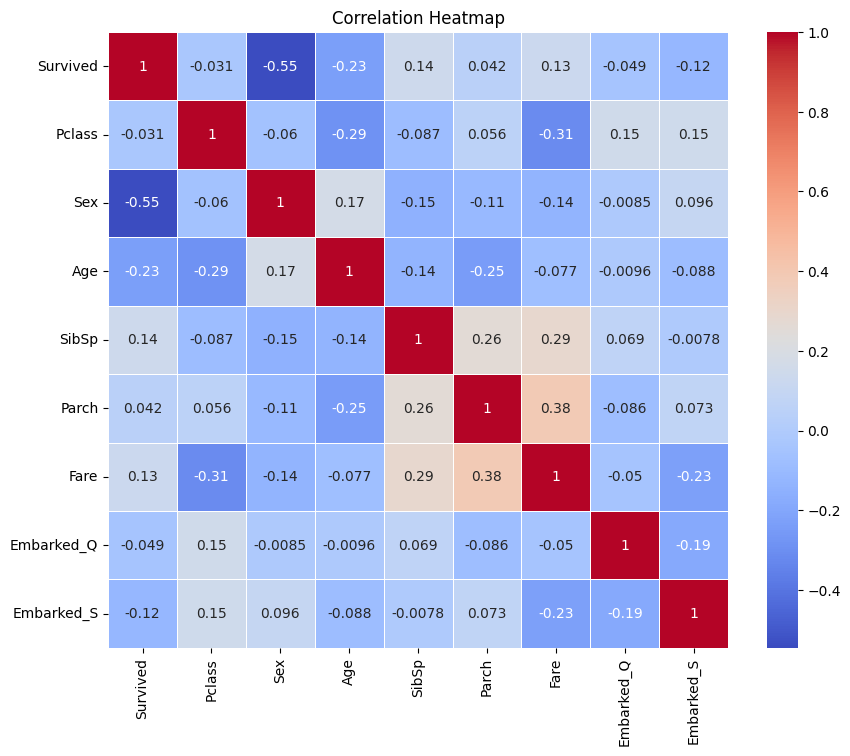

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(10,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

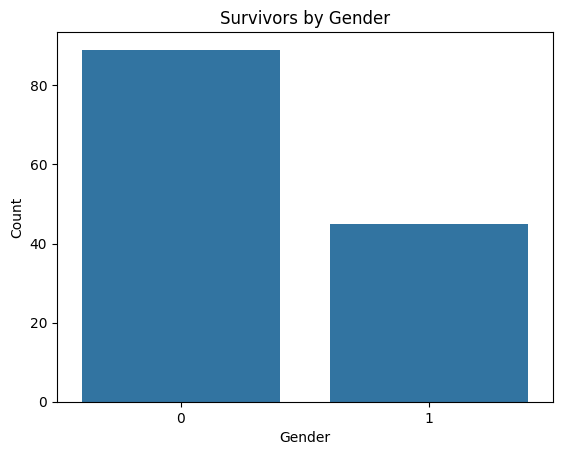

In [41]:
# Countplot for Survival by Gender (Survivors only)
sns.countplot(x='Sex', data=data[data['Survived'] == 1])
plt.title('Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

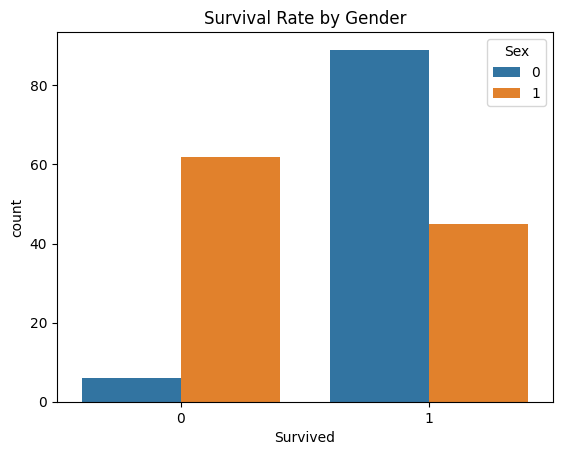

In [43]:
# Survival Rate by gender
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival Rate by Gender')
plt.show()

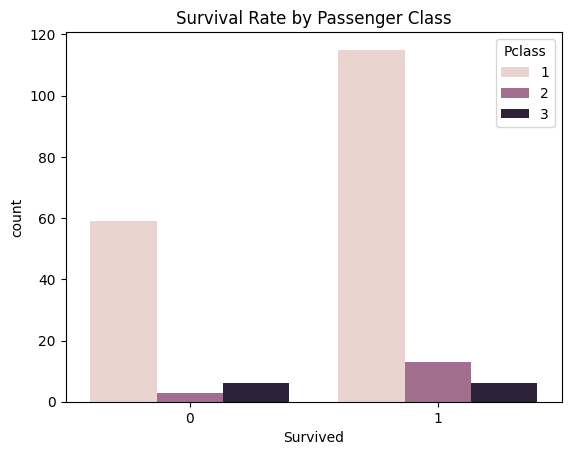

In [44]:
# Survival Rate by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

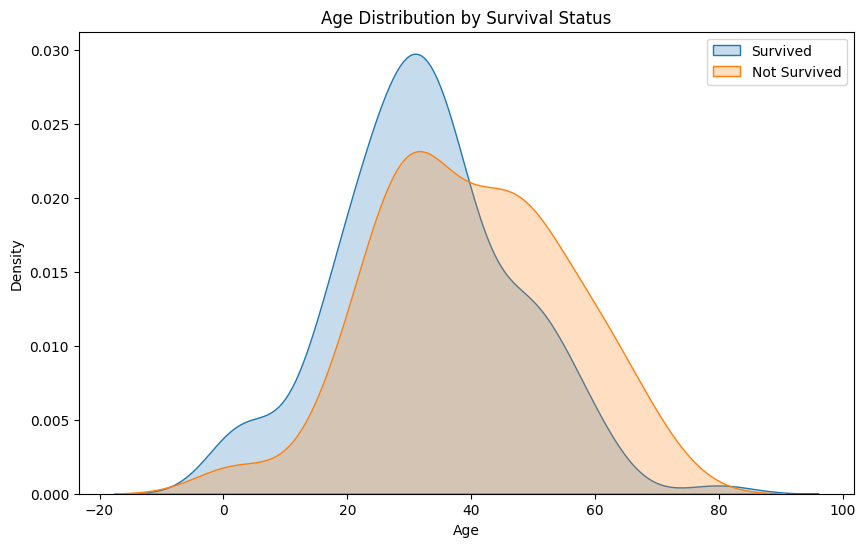

In [45]:
# KDE plot for Age distribution by Survival
plt.figure(figsize=(10, 6))
sns.kdeplot(data.loc[data['Survived'] == 1, 'Age'], fill=True, label='Survived')
sns.kdeplot(data.loc[data['Survived'] == 0, 'Age'], fill=True, label='Not Survived')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
